In [ ]:
'''
Reference: https://github.com/eddiebarry/similarity-matching-sentence-transformers
'''

'\nReference: https://github.com/eddiebarry/similarity-matching-sentence-transformers\n'

In [1]:
!pip install transformers
!pip install torchtext==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torchtext==0.10.0 (from versions: 0.1.1, 0.2.0, 0.2.1, 0.2.3, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.1, 0.15.2)
ERROR: No matching distribution found for torchtext==0.10.0


In [2]:
import torch
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

print(init_token, eos_token, pad_token, unk_token)

[CLS] [SEP] [PAD] [UNK]


In [5]:
from transformers import  BertModel

# Load BERT model
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
#Sample Code for PIL:
from PIL import Image, ImageEnhance, ImageFilter
import requests
from io import BytesIO

# Specify the URL of the image
url = "https://3.bp.blogspot.com/_UtY_ZR-MU98/TCt5r13qAxI/AAAAAAAAEBc/20SsDc2yzyE/s1600/2008+Hawaii+July+098.jpg"

# Send a request to the URL and retrieve the image content
response = requests.get(url)
image_content = BytesIO(response.content)

# Open the image using PIL
image = Image.open(image_content)
image = Image.open('subplot_0.png')


# Display the image
image.show()

In [9]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=273988879d27e9cd99583bcdb66dd836d29e79914c209b4aaac1137bb220af7e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [10]:
import scipy

Which operation do you want to perform on the image? rotate
Rotating Image
By how many degrees do you want to rotate the image? 90


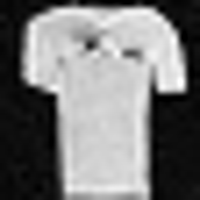

Denoised image processed successfully!
Press 1 to continue: 1
Which operation do you want to perform on the image? rotate
Rotating Image
By how many degrees do you want to rotate the image? 90


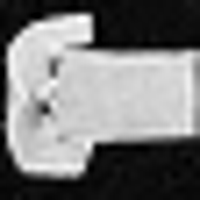

Denoised image processed successfully!
Press 1 to continue: 0


In [15]:
embedder = SentenceTransformer('bert-base-nli-mean-tokens')
# corpus = []
queries = ['change size','change brightness','rotate','flip','change contrast', 'sharpness', 'color balance', 'blur']
while(True):
  flag = 0
  ip = input('Which operation do you want to perform on the image? ')
  corpus = [ip]
  corpus_embeddings = embedder.encode(corpus)
  query_embeddings = embedder.encode(queries)

  all_distances = []
  for query, query_embedding in zip(queries, query_embeddings):
      distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]
      # print(query, distances)
      all_distances.append(distances[0])
  # print(all_distances)
  min_d = min(all_distances)
  min_idx = np.where(all_distances == min_d)[0]
  # print(min_idx)
  # min_idx = distances.where(min_d)
  required_operation = queries[int(min_idx)]
  if min_d>0.28:
    print('Sorry, functionality not added yet!')
  else:
    if required_operation == 'change size':
        print('Resizing')
        width = int(input("Please enter a numerical value for the width:"))
        height = int(input("Please enter a numerical value for the height:"))
        # Resize the image to a new size
        image = image.resize((width, height))  
        flag = 1

    elif required_operation == 'change brightness':
        # Increase brightness of the image
        print('Changing brightness')
        enhancer = ImageEnhance.Brightness(image)
        factor = float(input('By what factor do you want to change the brightness? '))
        image = enhancer.enhance(factor) 
        flag = 1 

    elif required_operation == 'rotate':
        # Rotate the image 
        print('Rotating Image')
        degrees = float(input("By how many degrees do you want to rotate the image? "))
        if degrees >= 0 and degrees <= 360:
          image = image.rotate(degrees)  # Replace 90 with your desired rotation angle
          flag = 1
        else:
          print('Sorry, invalid input!')

    elif required_operation == 'flip':
        # Flip the image horizontally
        print('Flipping image')
        ip3 = input('Do you want to flip the image horizontally or vertically?')
        option1 = 'horizontal'
        option2 = 'vertical'
        inputs_new1 = tokenizer([ip3, option1], return_tensors="pt", padding=True, truncation=True)
        inputs_new2 = tokenizer([ip3, option2], return_tensors="pt", padding=True, truncation=True)
        outputs1 = model(**inputs_new1)[1]  # Extract BERT embeddings (pooled output)
        outputs2 = model(**inputs_new2)[1] 
        # Compute cosine similarity between the two sentence embeddings
        cosine_similarity1 = torch.nn.functional.cosine_similarity(outputs1[0], outputs1[1], dim=0)
        cosine_similarity2 = torch.nn.functional.cosine_similarity(outputs2[0], outputs2[1], dim=0)
        out1 = cosine_similarity1.item()
        out2 = cosine_similarity2.item()
        print(out1,out2)
        if out1>out2 and out1>0.99:
          image = image.transpose(Image.FLIP_LEFT_RIGHT)
          flag = 1
        elif out2>0.99:
          image = image.transpose(Image.FLIP_TOP_BOTTOM)
          flag = 1
        else:
          print('Sorry, invalid input!')

    elif required_operation == 'contrast':
        # Increase contrast of the image
        print('Changing contrast')
        enhancer = ImageEnhance.Contrast(image)
        factor = float(input('By what factor do you want to change the contrast of the image? '))
        image = enhancer.enhance(factor)  # Increase contrast by a factor of 1.5
        flag = 1

    elif required_operation == 'sharpness':
        # Increase sharpness of the image
        print('Changing Sharpness')
        factor = float(input('By what factor do you want to sharpen the image? '))
        enhancer = ImageEnhance.Sharpness(image)
        image = enhancer.enhance(factor)  # Increase sharpness by a factor of 1.5
        flag = 1

    elif required_operation == 'blur':
        print('Blurring image')
        # Apply Gaussian blur to the image
        r = int(input('Enter required radius to blur the image:'))
        image = image.filter(ImageFilter.GaussianBlur(radius=r))  # Replace radius with your desired blur radius
        flag = 1
    
    if flag == 1:
       # # Save the processed image
      image.save("output_image.png")  # Replace "output_image.jpg" with your desired output file name
      # print('Resized image:')
      image.show()  
      print("Denoised image processed successfully!")

    ip = input('Press 1 to continue: ')
    if ip!='1':
      break





    